In [10]:
import torch
from torchvision import datasets, transforms
from torchvision import models
from torchmetrics import Accuracy
data_path = '/home/umbilnm/test_vibe/dataset'

transformations = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(512),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

model = models.resnet18(pretrained=True)
num_classes = 3
new_classifier = torch.nn.Sequential(
    torch.nn.Linear(in_features=512, out_features=num_classes),
    torch.nn.Softmax() 
)

model.fc = new_classifier

dataset = datasets.ImageFolder(root=data_path, transform=transformations)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
n_epochs = 20
for epoch in range(n_epochs):
    print('Epoch ', epoch+1)
    accuracy_metric = Accuracy(task='multiclass', num_classes=3)
    train_accuracy = Accuracy(task='multiclass', num_classes=3)
    model.train()
    for images, labels in train_loader:
        predictions = model(images)
        loss = criterion(predictions, labels)
        train_accuracy.update(predictions.argmax(1), labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print(f'Train Loss: {loss.item():.4f}, Train Accuracy: {train_accuracy.compute():.2f}')

    model.eval()
    for images, labels in test_loader:
        with torch.no_grad():
            
            probs = model(images)
            loss = criterion(probs, labels)
            accuracy_metric.update(probs.argmax(1), labels)
            
    print(f'Test Loss: {loss.item():.4f}, Test Accuracy: {accuracy_metric.compute():.2f}')
    print('---------------------------------')

Epoch  1
Train Loss: 0.5613, Train Accuracy: 0.87
Test Loss: 0.5590, Test Accuracy: 1.00
---------------------------------
Epoch  2
Train Loss: 0.5521, Train Accuracy: 0.99
Test Loss: 0.5593, Test Accuracy: 0.98
---------------------------------
Epoch  3
Train Loss: 0.5571, Train Accuracy: 1.00
Test Loss: 0.5536, Test Accuracy: 0.98
---------------------------------
Epoch  4
Train Loss: 0.5534, Train Accuracy: 1.00
Test Loss: 0.5533, Test Accuracy: 0.98
---------------------------------
Epoch  5
Train Loss: 0.5518, Train Accuracy: 1.00
Test Loss: 0.5526, Test Accuracy: 0.98
---------------------------------
Epoch  6
Train Loss: 0.5516, Train Accuracy: 1.00
Test Loss: 0.5522, Test Accuracy: 0.98
---------------------------------
Epoch  7
Train Loss: 0.5516, Train Accuracy: 1.00
Test Loss: 0.5525, Test Accuracy: 0.98
---------------------------------
Epoch  8
Train Loss: 0.5523, Train Accuracy: 1.00
Test Loss: 0.5541, Test Accuracy: 0.98
---------------------------------
Epoch  9


KeyboardInterrupt: 

In [11]:
torch.save(model.state_dict(), '/home/umbilnm/test_vibe/models/model_finetuning_experiment2.pt')

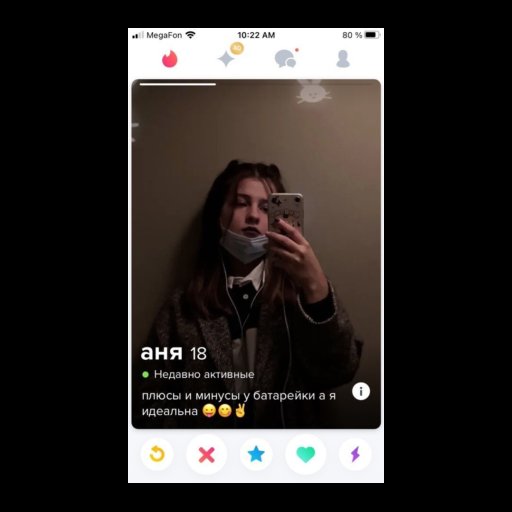

In [8]:
from PIL import Image
from torchvision import datasets, transforms
pic = Image.open('/home/umbilnm/test_vibe/dataset/dating/d744e2eee845bcdb7d2441d3fe3dd532.jpg')
transforms1 = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(512)])
transforms1(pic)